<a href="https://colab.research.google.com/github/abhisheksgithub/MLAdvancedPractice/blob/Phase_1/CNNPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Convolutional Neural network versus Multilayer Perceptron**
---
Image classification algorithm that would predict the image label once trained. The image labels are obtained from CIFAR10 datasets offered by Keras. The accuracy before training, after training with MLP and after training with CNN would be compared. 

In [1]:
# Demo practice session

from keras.utils import np_utils
import keras.utils as utl
import numpy as np
y_train = [2,3,0,0,1,3,2,0,3,3]
np.unique(y_train)
utl.to_categorical(y_train, len(np.unique(y_train)))

Using TensorFlow backend.


array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

Mini project to find the accuracy between MLP and CNN.

In [0]:
# Loading the CIFAR database present in the keras library
from keras.datasets import cifar10
import keras.utils as utls
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

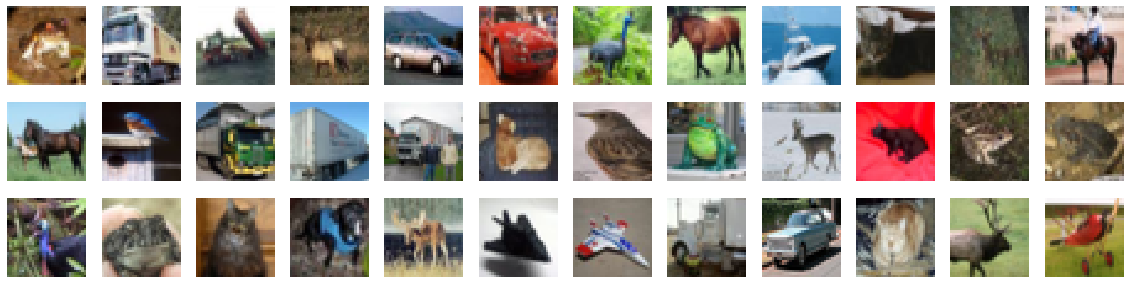

In [3]:
# test = np.asarray(x_train[0])
# test[0].shape
# Display few of the images, figsize is the length and bredth of each block

fig = plt.figure(figsize=(20,5))
for i in range(1, 37):
  ax = fig.add_subplot(3, 12, i, xticks = [], yticks = [])
  ax.imshow(np.squeeze(x_train[i-1]))

In [0]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [0]:
num_classes = len(np.unique(y_train))
y_train = utls.to_categorical(y_train, len(np.unique(y_train)))
y_test = utls.to_categorical(y_test, len(np.unique(y_test)))

In [0]:
x_train, x_valid = x_train[5000:], x_train[:5000]
y_train, y_valid = y_train[5000:], y_train[:5000]

In [7]:
# shape of the training set
print('Shape of the training set : ', x_train.shape)

# number of training samples
print('Number of training samples :', x_train.shape[0], '\nNumber of validation samples :', x_valid.shape[0])

Shape of the training set :  (45000, 32, 32, 3)
Number of training samples : 45000 
Number of validation samples : 5000


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [9]:
model = Sequential()
model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(1000, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 3,590,642
Trainable params: 3,590,642
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [11]:
help(model.evaluate)

Help on method evaluate in module keras.engine.training:

evaluate(x=None, y=None, batch_size=None, verbose=1, sample_weight=None, steps=None) method of keras.engine.sequential.Sequential instance
    Returns the loss value & metrics values for the model in test mode.
    
    Computation is done in batches.
    
    # Arguments
        x: Numpy array of test data (if the model has a single input),
            or list of Numpy arrays (if the model has multiple inputs).
            If input layers in the model are named, you can also pass a
            dictionary mapping input names to Numpy arrays.
            `x` can be `None` (default) if feeding from
            framework-native tensors (e.g. TensorFlow data tensors).
        y: Numpy array of target (label) data
            (if the model has a single output),
            or list of Numpy arrays (if the model has multiple outputs).
            If output layers in the model are named, you can also pass a
            dictionary mappin

In [12]:
# Accuracy before training
score_initail = model.evaluate(x_test, y_test, verbose = 1)
print('Accuracy without training (by random gyess) :',score_initail[1]*100)

10000/10000 [==============================] - 2s 170us/step
Accuracy without training (by random gyess) : 10.190000000000001


In [13]:
help(model.fit)

Help on method fit in module keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, **kwargs) method of keras.engine.sequential.Sequential instance
    Trains the model for a given number of epochs (iterations on a dataset).
    
    # Arguments
        x: Numpy array of training data (if the model has a single input),
            or list of Numpy arrays (if the model has multiple inputs).
            If input layers in the model are named, you can also pass a
            dictionary mapping input names to Numpy arrays.
            `x` can be `None` (default) if feeding from
            framework-native tensors (e.g. TensorFlow data tensors).
        y: Numpy array of target (label) data
            (if the model has a single output),
            or list of Numpy arrays (if the model has 

In [14]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='MLP.weights.best.hdf', verbose = 1, save_best_only = True)
model_fit = model.fit(x_train, y_train, batch_size = 32, epochs = 20, validation_data = (x_valid, y_valid), callbacks = [checkpointer], verbose=2, shuffle= True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 12s - loss: 2.4396 - acc: 0.2654 - val_loss: 1.8057 - val_acc: 0.3536

Epoch 00001: val_loss improved from inf to 1.80574, saving model to MLP.weights.best.hdf
Epoch 2/20
 - 12s - loss: 1.8526 - acc: 0.3306 - val_loss: 1.8651 - val_acc: 0.3260

Epoch 00002: val_loss did not improve from 1.80574
Epoch 3/20
 - 12s - loss: 1.8112 - acc: 0.3480 - val_loss: 1.7746 - val_acc: 0.3440

Epoch 00003: val_loss improved from 1.80574 to 1.77459, saving model to MLP.weights.best.hdf
Epoch 4/20
 - 12s - loss: 1.7932 - acc: 0.3591 - val_loss: 1.7108 - val_acc: 0.3814

Epoch 00004: val_loss improved from 1.77459 to 1.71076, saving model to MLP.weights.best.hdf
Epoch 5/20
 - 12s - loss: 1.7765 - acc: 0.3638 - val_loss: 1.7526 - val_acc: 0.3604

Epoch 00005: val_loss did not improve from 1.71076
Epoch 6/20
 - 12s - loss: 1.7702 - acc: 0.3676 - val_loss: 1.7649 - val_acc: 0.3492

Epoch 00006: val_loss did not improve from 1.71076
Epoch 7/20
 -

In [0]:
model.load_weights('MLP.weights.best.hdf')

In [16]:
score_mlp = model.evaluate(x_test, y_test, verbose = 1)
print('Accuracy of MLP after training : ', score_mlp[1]*100)

10000/10000 [==============================] - 1s 86us/step
Accuracy of MLP after training :  38.68


Now we will check the accuracy with CNN network. This is different from MLP as this considers the spatial difference as well between the pixels. 

In [0]:
# Image Augmentation using Keras.

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=10, # randomly rotate the image by an angle of 20 degrees
                             width_shift_range = 0.1, # randomly shift the image horizontally by 20 % of the total width
                             height_shift_range = 0.1, # randomly shift the image vertically by 20 % of the total height
                             horizontal_flip = True) # randomly flip the image horizontally

datagen.fit(x_train)

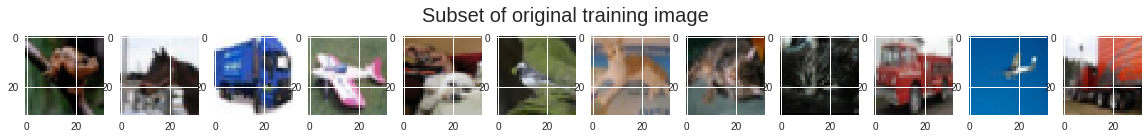

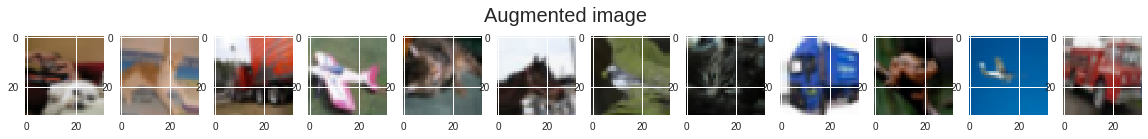

In [21]:
x_train_subset = x_train[:12]
fig = plt.figure(figsize = (20,2))
for i in range(len(x_train_subset)):
  ax = fig.add_subplot(1, 12, i+1)
  ax.imshow(x_train_subset[i])
fig.suptitle('Subset of original training image', fontsize = 20) 

fig = plt.figure(figsize = (20,2))
for x_batch in datagen.flow(x_train_subset, batch_size = 12):
  for i in range(0, 12):
    ax = fig.add_subplot(1, 12, i+1)
    ax.imshow(x_batch[i])
  fig.suptitle('Augmented image', fontsize = 20) 
  plt.show()
  break


In [34]:
from keras.models import Sequential 
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Convolution2D(filters = 16, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = 2))
model.add(Convolution2D(filters = 32, kernel_size=2,  padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Convolution2D(filters = 128, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 128)         16512     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 4, 4, 128)         0         
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [36]:
from keras.callbacks import ModelCheckpoint

batch_siz = 32
epochs = 100

checkpointer = ModelCheckpoint(filepath = 'aug_model.weights.best.hdf5', verbose = 1, save_best_only = True)
model.fit_generator(datagen.flow(x_train, y_train, batch_size= batch_siz),
                                steps_per_epoch = x_train.shape[0] // batch_siz, epochs = 100, verbose = 2, callbacks = [checkpointer], validation_data = (x_valid, y_valid))


Epoch 1/100
 - 32s - loss: 1.6437 - acc: 0.4042 - val_loss: 1.3209 - val_acc: 0.5328

Epoch 00001: val_loss improved from inf to 1.32088, saving model to aug_model.weights.best.hdf5
Epoch 2/100
 - 30s - loss: 1.3544 - acc: 0.5132 - val_loss: 1.1612 - val_acc: 0.5894

Epoch 00002: val_loss improved from 1.32088 to 1.16120, saving model to aug_model.weights.best.hdf5
Epoch 3/100
 - 30s - loss: 1.2681 - acc: 0.5489 - val_loss: 1.0861 - val_acc: 0.6118

Epoch 00003: val_loss improved from 1.16120 to 1.08614, saving model to aug_model.weights.best.hdf5
Epoch 4/100
 - 30s - loss: 1.2245 - acc: 0.5689 - val_loss: 1.0615 - val_acc: 0.6412

Epoch 00004: val_loss improved from 1.08614 to 1.06147, saving model to aug_model.weights.best.hdf5
Epoch 5/100
 - 30s - loss: 1.1960 - acc: 0.5837 - val_loss: 1.0230 - val_acc: 0.6374

Epoch 00005: val_loss improved from 1.06147 to 1.02305, saving model to aug_model.weights.best.hdf5
Epoch 6/100
 - 30s - loss: 1.1744 - acc: 0.5917 - val_loss: 1.1179 - val_a

In [0]:
model.load_weights('aug_model.weights.best.hdf5')

In [40]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Total Score on using CNN: ', score[1]*100)

Total Score on using CNN:  65.56
